# Problem $#4$ Classification
## Reference ( 0=Black)      (1 = Red)

## Imports

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

## Model function

In [57]:
def linear_model(x, theta):
    return x.dot(theta[1:]) + theta[0]

## Gradien function: $\nabla J$

In [58]:
def cost_gradient(x, y, model, theta):
    grad = np.zeros(len(theta))
    for i in range(len(x)):
        temp = model(x[i], theta) - y[i]
        for j in range(len(theta)):
            if j==0:
                grad[j] += temp
            else:    
                grad[j] += temp * x[i][j - 1]
    return grad / len(x)

## Algoritmo de descenso en gradiente: $\theta \leftarrow \theta - \alpha \nabla J$

In [59]:
def gradient_descend(x, y, model, gradient, theta, alpha, epsilon, max_iter):
    iter = 0
    theta_temp = None
    while iter < max_iter:
        iter += 1
        theta_temp = theta - alpha * gradient(x, y, model, theta)
        if (np.fabs(theta - theta_temp)).max() < epsilon:
            break
        theta = theta_temp
    print('Ejecución terminada en %d iteraciones' % iter)
    return theta

## Regresión logística

In [60]:
def logistic_function(x):
    return 1/(1+np.exp(-x))

### Model or Hypothesis

In [61]:
def linear_logistic_model(x, theta):
    return logistic_function(linear_model(x, theta))

### Loading data

In [62]:
data = pd.DataFrame.from_csv('tabla_4.csv')
data.head()

,x1,x2,y
0,-1.965148,8.393136,1
1,2.760206,7.760130,0
2,-2.954669,6.002797,1
3,-0.886867,4.841577,1
4,-0.558653,4.205288,1


### Graph input data

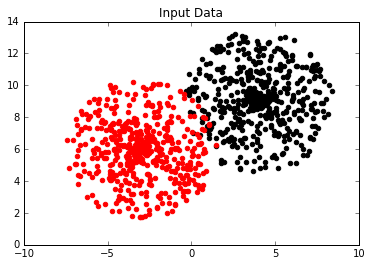

In [63]:
plt.scatter(x=data[data.y==0].x1, y=data[data.y==0].x2, color = "black")
plt.scatter(x=data[data.y==1].x1, y=data[data.y==1].x2, color = "red")
plt.title('Input Data')

In [64]:
theta = np.array([0,0,0])
alpha = learning_rate = 0.1
x = data[['x1', 'x2']].as_matrix()
y = data['y'].as_matrix()
theta = gradient_descend(x, 
                         y, 
                         linear_logistic_model, 
                         cost_gradient,
                         theta, 
                         alpha=learning_rate, 
                         epsilon=0.000001, 
                         max_iter=10000)
theta

Ejecución terminada en 10000 iteraciones


array([ 5.9099606 , -2.40526339, -0.64558088])

## Plot Prediction line &  data

In [65]:
model_x = np.linspace(-2, 3, 200)
model_y = (-theta[1] * model_x - theta[0]) / theta[2]

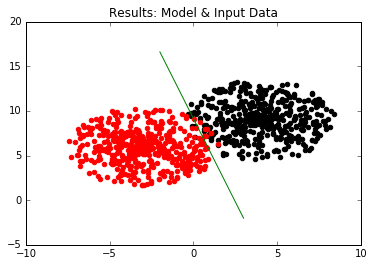

In [66]:
plt.scatter(x=data[data.y==0].x1, y=data[data.y==0].x2, color="black")
plt.scatter(x=data[data.y==1].x1, y=data[data.y==1].x2, color="red")
plt.plot(model_x, model_y, color="green")
plt.title('Results: Model & Input Data')

### Testing Predictions

In [67]:
testing_point = np.array([5, 10])
#testing_point = np.array([-5, 5])

if(linear_logistic_model(testing_point, theta) < 0.5 ):
    print('Possible Black')
else:
    print('Possible Red')

Possible Black
